# 1ое домашнее задание - Метод наименьших квадратов

**Выполнила**: Полиенко Анастасия Николаевна, НПМбд-01-19 (вторая подгруппа)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Задача данной домашней работы - приблизить функцию $f (x) = \sin \frac{x}{5} \cdot e^{\frac{x}{10}} + 5 e^{- \frac{1}{2} x}$ многочленом вида $w_0 + w_1 x + w_2 x^2 + w_3 x^3 + \dots + w_{n - 1} x^{n - 1}$ 

In [3]:
def f(x):
    return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(- x / 2) 

## 1. Полиномиальная регрессия

Многочлен $n - 1$ степени однозначно определяется $n$ различными точками. Таким образом, можно найти коэффициенты многочлена через решение системы:

$\begin{equation*}
 \begin{cases}
   w_0 + w_1 x_1 + w_2 x_1^2 + w_3 x_1^3 + \dots + w_{n - 1} x_1^{n - 1} = f (x_1) 
   \\
   \cdots
   \\
   w_0 + w_1 x_n + w_2 x_n^2 + w_3 x_n^3 + \dots + w_{n - 1} x_n^{n - 1} = f (x_n)
 \end{cases}
\end{equation*}$

Создадим функцию для нахождения коэффициентов полинома. В матрицу А будут записаны соответствующие значения степеней $x_i$, а в вектор b - значения $f (x_i)$. Искомые коэффициенты будут решением системы $A x = b$

In [4]:
def pol_reg_coef(n, f):
    '''
    n -- количество точек
    '''
    x = np.linspace(1, 15, n)
    b = f(x)
    A = np.ones([n, n])
    for i in range(1, n):
        A[:, i] = x ** i
    return np.linalg.solve(A, b)    

Создадим функцию, которая будет создавать полином с заданными коэффициентами.

In [5]:
def polinom(w, x):
    n = len(w)
    result = 0
    for i in range(n):
        result += w[i] * (x ** i)
    return result

Посмотрим на результат работы функций. При $n = 4$ полином достаточно отличается от исходной функции, в то время как при $n = 10$ графики функции и полинома практически одинаковые.

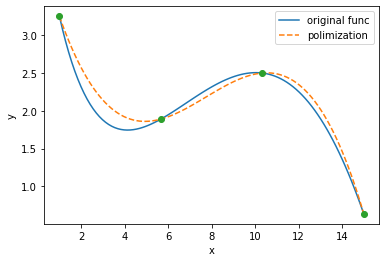

In [6]:
n = 4
w = pol_reg_coef(n, f)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
x = np.linspace(1, 15, n)
ax.plot(xx, f(xx), label = 'original func')
ax.plot(xx, polinom(w, xx), label = 'polimization', linestyle = 'dashed')
ax.plot(x, f(x), marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

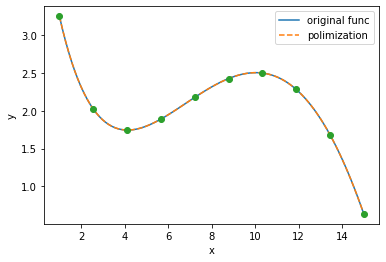

In [7]:
n = 10
w = pol_reg_coef(n, f)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
x = np.linspace(1, 15, n)
ax.plot(xx, f(xx), label = 'original func')
ax.plot(xx, polinom(w, xx), label = 'polimization', linestyle = 'dashed')
ax.plot(x, f(x), marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

## 2. Полиномиальная регрессия с зашумлёнными данными

В данном случае значение функции f дано с некоторым шумом.

In [8]:
def compute_coef(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    n = len(xx)
    b = yy
    A = np.ones([n, n])
    for i in range(1, n):
        A[:, i] = xx ** i
    return np.linalg.solve(A, b)

При добавлении шума становится видно, что с увеличением количества точек полином начинает вести себя "плохо" в области концов графика даже при низких значениях шума ($\sigma = 0.01$). Это связанно с тем, что при добавлении даже небольшой погрешности матрица А становится плохо обусловленной.

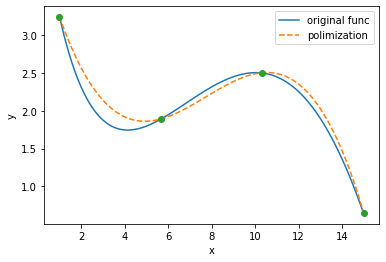

In [9]:
n = 4
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_coef(x_points, y_points)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label = 'original func')
ax.plot(xx, polinom(w, xx), label = 'polimization', linestyle = 'dashed')
ax.plot(x_points, y_points, marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

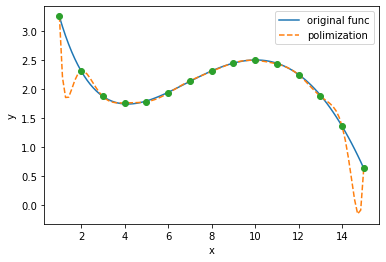

In [11]:
n = 15
noise = 0.01
x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = compute_coef(x_points, y_points)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
ax.plot(xx, f(xx), label = 'original func')
ax.plot(xx, polinom(w, xx), label = 'polimization', linestyle = 'dashed')
ax.plot(x_points, y_points, marker = 'o', linestyle = '')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()

## 3. Метод наименьших квадратов

Минусом полиномиальной регрессии является то, что для наилучшего приближения нужно строить полиномы достаточно большой степени, что неудобно на практике.

Пусть количество точек равно N, а степень искомого полинома - n, где $N > n$. Тогда СЛАУ будет иметь больше уравнений, чем число неизвестных.

В таком случае необходимо решить задачу минимизации неувязки: $\min\limits_{x} = \vert\vert A x - b \vert\vert$

Решение этой задачи можно найти с помощью псевдо-обратной матрицы (матрицы Мура-Пенроуза): $x = A^+ b = (A^T A)^{-1} A^T b$

In [66]:
def mnk_coef(xx, yy):
    '''
    xx, yy - набор точек и значений неизвестной функции
    '''
    st = 4 #степень полинома
    n = len(xx)
    b = yy
    A = np.ones([n, st + 1])
    for i in range(1, st + 1):
        A[:, i] = xx ** i
    return np.linalg.inv(A.transpose().dot(A)).dot(A.transpose()).dot(b)

Можем увидеть, что полином всего лишь четвёртой степени даёт достаточное приближение, с учётом того, что в изначальныъ данных был большой шум.

[ 4.47763935e+00 -1.58909722e+00  2.96891932e-01 -1.94414676e-02
  3.71359838e-04]


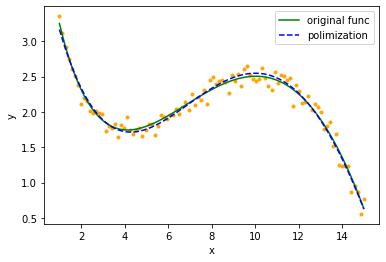

In [67]:
n = 100
noise = 0.1
x_points = x_points = np.linspace(1, 15, n)
y_points = f(x_points) + np.random.randn(n) * noise
w = mnk_coef(x_points, y_points)
fig, ax = plt.subplots()
xx = np.linspace(1, 15, 100)
ax.plot(x_points, y_points, marker = 'o', linestyle = '', markersize = 3, color = 'orange')
ax.plot(x_points, f(x_points), label = 'original func', color = 'green')
ax.plot(x_points, polinom(w, x_points), label = 'polimization', linestyle = 'dashed', color ='blue')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
print(w)